<a href="https://colab.research.google.com/github/DhanalakshmiSengottaiyan/ML_RandomForest/blob/main/Random_Forest(Heart_Disease_Prediction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##Problem Statement: To predict the accuracy of heart disease prediction using the given dataset

In [1]:
import pandas as pd
import io
from google.colab import files
uploaded = files.upload()

Saving Sample Data for Random Forest (Heart Disease).csv to Sample Data for Random Forest (Heart Disease).csv


In [2]:
heart_data = pd.read_csv(io.BytesIO(uploaded['Sample Data for Random Forest (Heart Disease).csv']))

In [3]:
# Importing the required libraries
import pandas as pd, numpy as np
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from collections import OrderedDict
from sklearn import tree
import matplotlib as matplotlib

In [4]:
heart_data.shape

(270, 5)

In [5]:
heart_data.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


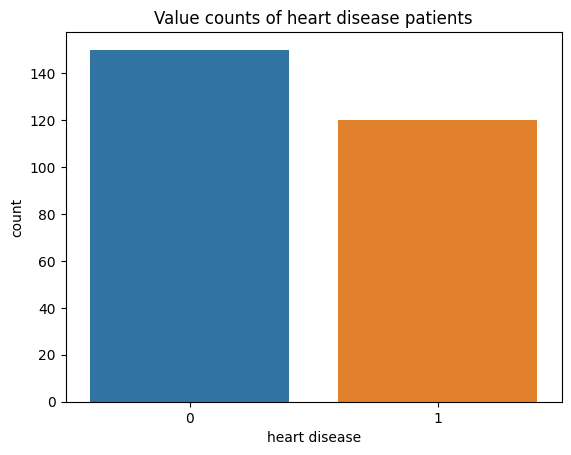

In [6]:
sns.countplot(x=heart_data['heart disease'])
plt.title('Value counts of heart disease patients')
plt.show()

# **Building Model without any hyper-parameter tuning**

In [7]:
# Putting feature variable to X
X = heart_data.drop('heart disease',axis=1)
# Putting response variable to y
y = heart_data['heart disease']

In [8]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)
X_train.shape, X_test.shape

((189, 4), (81, 4))

In [9]:
#n_jobs : integer, optional (default=1)
#The number of jobs to run in parallel for both fit and predict. If  -1, then the number of jobs is set to the number of cores.
#max_depth: The maximum depth of the tree. If None, then nodes are expanded until
#all leaves are pure or until all leaves contain less than min_samples_split samples.
#n_estimators: The number of trees in the forest. (Default is 100)
#min_samples_leaf: The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at
#least ``min_samples_leaf`` training samples in each of the left and right branches.
#max_features : {"auto", "sqrt", "log2"}, int or float, default="auto"
#The number of features to consider when looking for the best split

classifier_rf = RandomForestClassifier(random_state=100, n_jobs=-1, max_depth=5, n_estimators=100)

In [10]:
#Fitting the model
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, random_state=100)

In [11]:
y_pred_test = classifier_rf.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score
#Accuracy score
print("Accuracy score  test dataset:  t", accuracy_score(y_test,y_pred_test))

Accuracy score  test dataset:  t 0.5925925925925926


# **Building Model with Hyper-Parameter Tuning**

In [13]:
#Defining the model to be iterated
rf = RandomForestClassifier(random_state=100, n_jobs=-1)

In [14]:
#Max_depth: This hyperparameter represents the maximum level of each tree in the random forest model. A deeper tree performs well
#and captures a lot of information about the training data, but will not generalize well to test data. By default, this value is
#set to "None" in the Scikit-Learn library, which means that the trees are left to expand completely.

#Min_samples_leaf: The minimum number of samples required to be at the leaf node of each tree. The default value is 1 in Scikit-Learn.

#Min_samples_split: The minimum number of samples required to split an internal node of each tree. The default value is 2 in Scikit-Learn.

#N_estimators: The number of decision trees in the forest. The default number of estimators in Scikit-Learn is 10.

params = {
    'max_depth': [2,5,10],
    'min_samples_leaf': [5,20,100],
    'min_samples_split':[5,50,100],
    'n_estimators': [10,50,100] #This variable was not present for decision tree
}


In [15]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [16]:
# Takes ~2 min to run
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1, random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10],
                         'min_samples_leaf': [5, 20, 100],
                         'min_samples_split': [5, 50, 100],
                         'n_estimators': [10, 50, 100]},
             scoring='accuracy', verbose=1)

In [17]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=50,
                       n_estimators=10, n_jobs=-1, random_state=100)

In [18]:
classifier_rf_tuned = RandomForestClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=50,
                       n_estimators=10, n_jobs=-1, random_state=100)
classifier_rf_tuned.fit(X_train, y_train)

y_pred_test = classifier_rf_tuned.predict(X_test)

from sklearn.metrics import accuracy_score
#Accuracy score
print("Accuracy score  test dataset:  t", accuracy_score(y_test,y_pred_test))

Accuracy score  test dataset:  t 0.6049382716049383
